In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.5'

# Deep Neural Network for Sentiment Classification.
Deep learning text classification model architectures generally consist of the following components: 

Input text (X) + Embeddings + Deep Neural Networks (RNN, LSTM, CNN+LSTM,..., followed by some FC layers) + Output (Y).

In this exercise, you will build different models in order to do the Sentiment Classification on the IMDB movie review dataset.

# Word embeddings

Two possible ways to represent a word as a vector are one-hot encoding and word embeddings.
While the vectors obtained through one-hot encoding are binary, sparse and very high-dimensional (same dimensionality as the 
number of words in the vocabulary), "word embeddings" are low-dimensional floating point vectors 
(i.e. "dense" vectors, as opposed to sparse vectors). 
Unlike word vectors obtained via one-hot encoding, word embeddings are learned from data. 
It is common to see word embeddings that are 256-dimensional, 512-dimensional, or 1024-dimensional when dealing with very large vocabularies. 

![word embeddings vs. one hot encoding](https://s3.amazonaws.com/book.keras.io/img/ch6/word_embeddings.png)

## Learning word embeddings with the `Embedding` layer

Word Embedding is a representation of text where words that have the same meaning have a similar representation. In other words it represents words in a coordinate system where related words, based on a corpus of relationships, are placed closer together. In the deep learning frameworks such as TensorFlow, Keras, this part is usually handled by an embedding layer which stores a lookup table to map the words represented by numeric indexes to their dense vector representations.

In [2]:
from keras.layers import Embedding

# The Embedding layer takes at least two arguments:
# the number of possible tokens, here 1000 (1 + maximum word index),
# and the dimensionality of the embeddings, here 64.
embedding_layer = Embedding(1000, 64)

The `Embedding` layer is best understood as a dictionary mapping integer indices (which stand for specific words) to dense vectors. It takes 
as input integers, it looks up these integers into an internal dictionary, and it returns the associated vectors. It's effectively a dictionary lookup.

The `Embedding` layer takes as input a 2D tensor of integers, of shape `(samples, sequence_length)`, where each entry is a sequence of 
integers. It can embed sequences of variable lengths. All sequences in a batch must have the same length, though (since we need to pack them into a single tensor), so sequences that are shorter than others should be padded 
with zeros, and sequences that are longer should be truncated.

# Understanding recurrent neural networks

A major characteristic of all neural networks you’ve seen so far, such as densely connected networks and convnets, is that they have no memory. Each input shown to them is processed independently, with no state kept in between inputs. With such net- works, in order to process a sequence or a temporal series of data points, you have to show the entire sequence to the network at once: turn it into a single data point.

A recurrent neural network (RNN) adopts the same principle, albeit in an extremely simplified version: it processes sequences by iterating through the sequence elements and maintaining a state containing information relative
to what it has seen so far. In effect, an RNN is a type of
neural network that has an internal loop.




## An example of a recurrent layer in Keras

In [3]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, LSTM, Conv1D, GlobalMaxPooling1D

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


##Question: 
  - please explain the number of parameters per layer (see pdf file 
for help) </br>
<font color ='blue'> 
On a un timesteps=10000 (nombre d'inputs), input_features = 32 (taille de l'input)  et output_features = 32 (taille de l'output). Les dimensions de W sont 32x32 (output_features x input_features) et celles de U sont 32x32 (output_features x output_features) et b est un vecteur de dimension 32 (output_features). Pour la première couche on a ainsi 10000*32=320000 parametres. Pour la deuxième couche on a 32.32+32.32+32=2080 parametres (car output(t) = W.input + U.output(t-1) +b).
</font>
  - build different models, for each model, evaluate its performance for the IMDB movie review classification problem.

  Here are the code for data preparation:


In [4]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


Build a model with RNN and Dense layer to do the sentiment classification on the IMDB dataset.

In [5]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.add(Dense(1))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(input_train, y_train, epochs=5, batch_size=32, validation_data=(input_train,y_train))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 25000 samples, validate on 25000 samples
Epoch 1/5





25000/25000 [==============================] - 204s 8ms/step - loss: 0.6952 - acc: 0.6421 - val_loss: 0.4223 - val_acc: 0.8282
Epoch 2/5
25000/25000 [==============================] - 199s 8ms/step - loss: 0.4872 - acc: 0.7777 - val_loss: 0.3981 - val_acc: 0.8526
Epoch 3/5
25000/25000 [==============================] - 199s 8ms/step - loss: 0.3695 - acc: 0.8474 - val_loss: 0.2380 - val_acc: 0.9114
Epoch 4/5
25000/25000 [==============================] - 200s 8ms/step - loss: 0.2539 - acc: 0.8419 - val_loss: 0.3749 - val_acc: 0.8210
Epoch 5/5
25000/25000 [==============================] - 200s 8ms/step - loss: 0.3427 - acc: 0.8094 - val_loss: 0.3075 - val_acc: 0.8795


You can display the training and validation loss and accuracy (for all models)

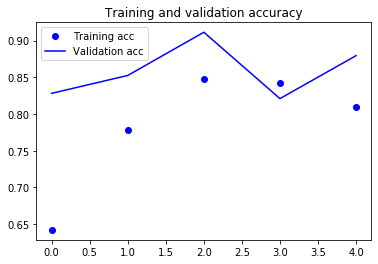

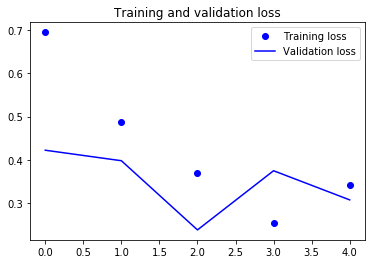

In [6]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Build a model with LSTM (LSTM layer) and do the same task (see pdf file for explanation).

In [7]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(LSTM(32))
model.add(Dense(1))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(input_train, y_train, epochs=5, batch_size=32, validation_data=(input_train,y_train))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 776s 31ms/step - loss: 0.6133 - acc: 0.7292 - val_loss: 0.3134 - val_acc: 0.8958
Epoch 2/5
25000/25000 [==============================] - 748s 30ms/step - loss: 0.3730 - acc: 0.8661 - val_loss: 0.2398 - val_acc: 0.9174
Epoch 3/5
25000/25000 [==============================] - 744s 30ms/step - loss: 0.3178 - acc: 0.8709 - val_loss: 0.2644 - val_acc: 0.8811
Epoch 4/5
25000/25000 [==============================] - 758s 30ms/step - loss: 0.3369 - acc: 0.8696 - val_loss: 0.2064 - val_acc: 0.9353
Epoch 5/5
25000/25000 [==============================] - 778s 31ms/step - loss: 0.2168 - acc: 0.9172 - val_loss: 0.1641 - val_acc: 0.9412


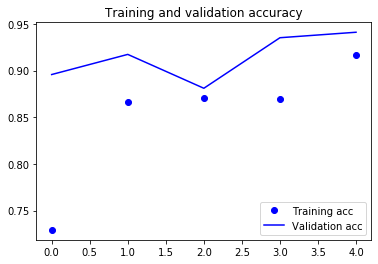

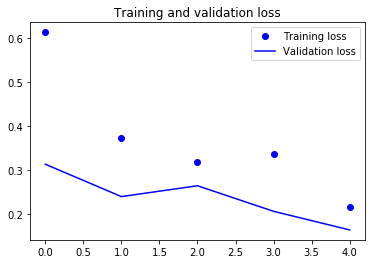

In [8]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Build a model with CNN (with Conv1D, GlobalMaxPooling1D) and do the same task.

In [9]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(Conv1D(32,5,strides=1))
model.add(GlobalMaxPooling1D(data_format='channels_last'))
model.add(Dense(1))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(input_train, y_train, epochs=5, batch_size=32, validation_data=(input_train,y_train))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 9s 376us/step - loss: 0.4872 - acc: 0.7708 - val_loss: 0.3014 - val_acc: 0.8860
Epoch 2/5
25000/25000 [==============================] - 6s 238us/step - loss: 0.2940 - acc: 0.8639 - val_loss: 0.1848 - val_acc: 0.8838
Epoch 3/5
25000/25000 [==============================] - 6s 237us/step - loss: 0.1919 - acc: 0.7945 - val_loss: 0.1367 - val_acc: 0.8074
Epoch 4/5
25000/25000 [==============================] - 6s 234us/step - loss: 0.1295 - acc: 0.7290 - val_loss: 0.0792 - val_acc: 0.6998
Epoch 5/5
25000/25000 [==============================] - 6s 226us/step - loss: 0.0811 - acc: 0.6469 - val_loss: 0.0567 - val_acc: 0.6029


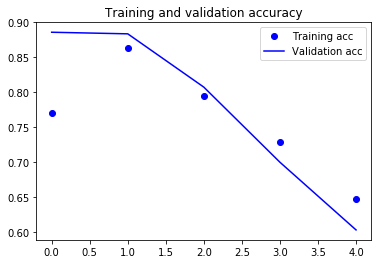

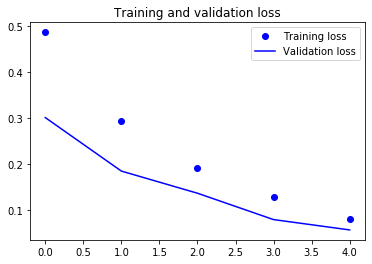

In [10]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Combine CNN and LSTM and do the same task.

In [11]:
model = Sequential()
model.add(Embedding(10000,32))
model.add(Conv1D(32,5,strides=1))
model.add(LSTM(32))
model.add(Dense(1))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(input_train, y_train, epochs=5, batch_size=32, validation_data=(input_train,y_train))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 780s 31ms/step - loss: 0.6296 - acc: 0.6830 - val_loss: 0.4708 - val_acc: 0.7957
Epoch 2/5
25000/25000 [==============================] - 771s 31ms/step - loss: 0.4205 - acc: 0.8391 - val_loss: 0.2853 - val_acc: 0.9042
Epoch 3/5
25000/25000 [==============================] - 776s 31ms/step - loss: 0.4649 - acc: 0.7914 - val_loss: 0.3732 - val_acc: 0.8494
Epoch 4/5
25000/25000 [==============================] - 775s 31ms/step - loss: 5.0234 - acc: 0.3523 - val_loss: 8.0591 - val_acc: 0.0212
Epoch 5/5
25000/25000 [==============================] - 798s 32ms/step - loss: 8.0591 - acc: 0.0148 - val_loss: 8.0590 - val_acc: 0.0132


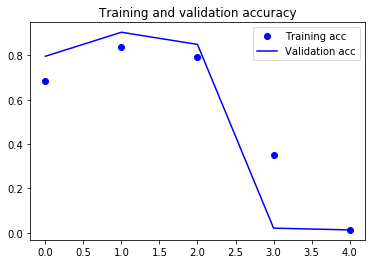

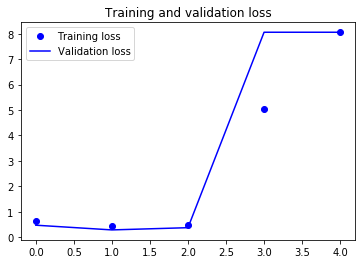

In [12]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

<font color ='blue'> 
Comparaisons entre les différents models:
Le LSTM est plus performant que le RNN, qui est plus performant que le CNN.
En effet le CNN est le moins performant car la dépendance entre les mots n'est pas permise avec ce modèle.
Le LSTM est plus performant que le RNN car avec ce dernier plus les mots sont éloignés plus il est difficile de voir leur dépendance (problème du vanishing gradient) , le LSTM lui contourne ce problème grâce à l'utilisation de retenus (carrys) qui transportent l'information au cours du temps.
Le LSTM est cependant beaucoup plus long à exécuter (plus d'informations).

</font>